<a href="https://colab.research.google.com/github/JacquesBLR/Causal_Inference/blob/main/Calcul_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-4232727834.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_manual = np.trapz(tpr, fpr)  # Méthode des trapèzes


AUC (sklearn): 0.9402
AUC (calcul manuel): 0.9402


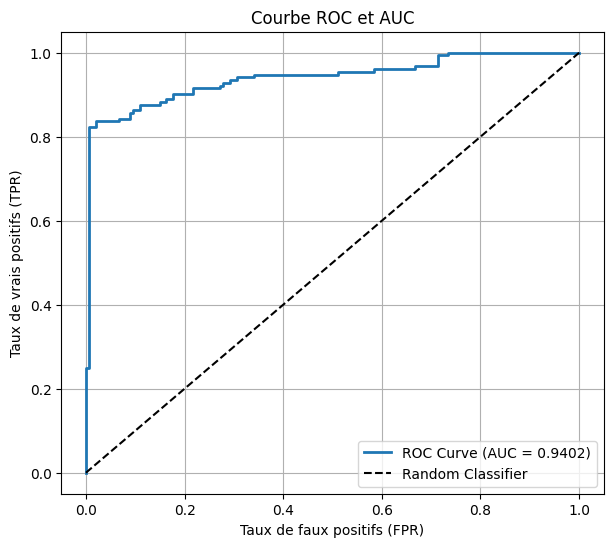

In [ ]:
# 📦 Import des librairies nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 🔢 1. Génération de données simulées
X, y = make_classification(n_samples=1000, n_features=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# 📊 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# 🧠 3. Entraînement d’un modèle de classification
model = LogisticRegression()
model.fit(X_train, y_train)

# 🎯 4. Prédiction des probabilités pour la classe positive
y_scores = model.predict_proba(X_test)[:, 1]

# 📈 5. Calcul des points ROC (TPR, FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 🧮 6. Calcul de l'AUC via intégration numérique
auc_sklearn = auc(fpr, tpr)
auc_manual = np.trapz(tpr, fpr)  # Méthode des trapèzes

print(f"AUC (sklearn): {auc_sklearn:.4f}")
print(f"AUC (calcul manuel): {auc_manual:.4f}")

# 📊 7. Visualisation de la courbe ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_sklearn:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC et AUC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
